In [22]:
from typing import Text, Any, Dict, List, Union, Optional, Tuple
def tokenize(sents: Text) -> List[Dict[Text,Text]]:
    import jieba.posseg as pseg
    toks = pseg.cut(sents)
    terms = []
    for i, (word, flag) in enumerate(toks):
        terms.append({'term': flag, 'value': word})
    return terms

sents='哪种水果在上个月卖得最好'
# sents='我想去学校上学'
# tokenize('我想去学校上学')
terms=tokenize(sents)
toks=' '.join([w['value'] for w in terms])
print(toks)
terms

哪 种 水果 在 上个月 卖 得 最好


[{'term': 'r', 'value': '哪'},
 {'term': 'm', 'value': '种'},
 {'term': 'n', 'value': '水果'},
 {'term': 'p', 'value': '在'},
 {'term': 't', 'value': '上个月'},
 {'term': 'v', 'value': '卖'},
 {'term': 'ud', 'value': '得'},
 {'term': 'a', 'value': '最好'}]

In [16]:
from spacy.matcher import PhraseMatcher
from sagas.nlu.stanza_helper import get_nlp
from spacy_stanza import StanzaLanguage

snlp = get_nlp('zh', processors='tokenize', pretokenized=False)
# snlp = get_nlp('zh')
# doc = snlp('我想去学校上学')
doc = snlp(sents)
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: 1	text: 哪种
id: 2	text: 水果
id: 3	text: 上
id: 4	text: 个
id: 5	text: 月
id: 6	text: 卖得
id: 7	text: 最好


In [23]:
snlp = get_nlp('zh', pretokenized=True)
doc = snlp(toks)
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: 1	text: 哪
id: 2	text: 种
id: 3	text: 水果
id: 4	text: 在
id: 5	text: 上个月
id: 6	text: 卖
id: 7	text: 得
id: 8	text: 最好


,index,text,lemma,upos,xpos,entity
0,1,哪,哪,DET,DT,[O]
1,2,种,种,NOUN,NNB,[O]
2,3,水果,水果,NOUN,NN,[O]
3,4,在,在,ADP,IN,[O]
4,5,上个月,上个月,NOUN,NN,[S-DATE]
5,6,卖,卖,AUX,VV,[O]
6,7,得,得,PART,DEV,[O]
7,8,最好,最好,ADJ,JJ,[O]


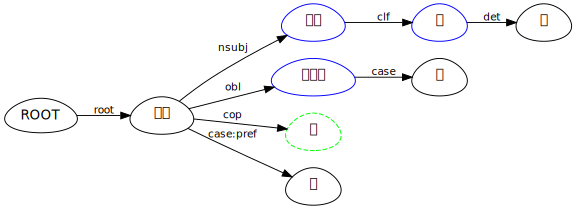

In [24]:
from sagas.tracker_jupyter import enable_jupyter_tracker

enable_jupyter_tracker()

def vis(doc, sents:Text):
    from sagas.nlu.uni_viz import EnhancedViz
    from sagas.nlu.uni_impl_stanza import StanzaSentImpl
    cv = EnhancedViz(shape='egg', size='8,5', fontsize=20)
    unidoc=StanzaSentImpl(doc, text=sents)
    return cv.analyse_doc(unidoc, None, console=False)

vis(doc.sentences[0], sents)

2020-04-22 18:09:08 INFO: Loading these models for language: zh-hans (Simplified_Chinese):
| Processor | Package   |
-------------------------
| tokenize  | gsdsimp   |
| pos       | gsdsimp   |
| lemma     | gsdsimp   |
| depparse  | gsdsimp   |
| ner       | ontonotes |

2020-04-22 18:09:08 INFO: Use device: cpu
2020-04-22 18:09:08 INFO: Loading: tokenize
2020-04-22 18:09:08 INFO: Loading: pos
2020-04-22 18:09:11 INFO: Loading: lemma
2020-04-22 18:09:11 INFO: Loading: depparse
2020-04-22 18:09:13 INFO: Loading: ner
2020-04-22 18:09:14 INFO: Done loading processors!


,index,text,lemma,upos,xpos,entity
0,1,你,你,PRON,PRP,"[, ]"
1,2,在,在,VERB,VV,"[, ]"
2,3,北京,北京,PROPN,NNP,"[GPE, B]"
3,4,的,的,PART,DEC,"[, ]"
4,5,公司,公司,NOUN,NN,"[, ]"
5,6,的,的,PART,DEC,"[, ]"
6,7,主要传真号码,主要传真号码,NOUN,NN,"[, ]"
7,8,是,是,VERB,VC,"[, ]"
8,9,什么,什么,PRON,WP,"[, ]"


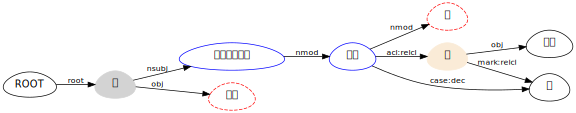

In [1]:
from sagas.nlu.analspa import analspa
spa=analspa('zh')
spa.add_pats("TerminologyList", ["主要传真号码"])
spa.graph('你在北京的公司的主要传真号码是什么')

2020-04-22 18:40:08 INFO: Loading these models for language: zh-hans (Simplified_Chinese):
| Processor | Package   |
-------------------------
| tokenize  | gsdsimp   |
| pos       | gsdsimp   |
| lemma     | gsdsimp   |
| depparse  | gsdsimp   |
| ner       | ontonotes |

2020-04-22 18:40:08 INFO: Use device: cpu
2020-04-22 18:40:08 INFO: Loading: tokenize
2020-04-22 18:40:08 INFO: Loading: pos
2020-04-22 18:40:10 INFO: Loading: lemma
2020-04-22 18:40:10 INFO: Loading: depparse
2020-04-22 18:40:13 INFO: Loading: ner
2020-04-22 18:40:14 INFO: Done loading processors!


,index,text,lemma,upos,xpos,entity
0,1,哪种,哪种,ADJ,JJ,"[, ]"
1,2,水果,水果,NOUN,NN,"[, ]"
2,3,在,在,ADP,IN,"[, ]"
3,4,上个月,上个月,NOUN,NN,"[DATE, B]"
4,5,卖得,卖得,VERB,VV,"[, ]"
5,6,最好,最好,ADJ,JJ,"[, ]"


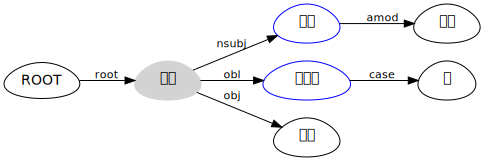

In [1]:
from sagas.nlu.analspa import analspa
spa=analspa('zh')
spa.graph('哪种水果在上个月卖得最好')